# ENGR 1330 – Computational Thinking and Data Science

## Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

### Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

## Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

## Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

## Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

## Libraries 
- numpy
- pandas
- matplotlib
- scikit

## Data
- using statistics and graphs describe your data

In [1]:
# read in the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
data_filter_unused_column = df.drop('Unnamed: 1', axis=1)

data = data_filter_unused_column.dropna(subset='BOROUGH' , axis=0) #filtering rows with null boroughs

years = []
for i in data['CRASH DATE']:
    year = i[-4:]
    years.append(year)

    
year_int = [eval(i) for i in years]
data['CRASH DATE'] = year_int
data

C:\Users\jbthe\AppData\Local\Temp\ipykernel_14580\467113339.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRASH DATE'] = year_int


,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2021,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
7,2021,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,2.0,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,2021,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,2021,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048566,2016,QUEENS,11418.0,40.699856,-73.840630,"(40.699856, -73.84063)",85 AVENUE,109 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3533258,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1048567,2016,MANHATTAN,10065.0,40.763110,-73.962524,"(40.76311, -73.962524)",EAST 63 STREET,2 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3517383,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1048568,2016,QUEENS,11423.0,40.713880,-73.754040,"(40.71388, -73.75404)",JAMAICA AVENUE,FRANCIS LEWIS BOULEVARD,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3512236,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1048571,2016,MANHATTAN,10013.0,40.723248,-74.004970,"(40.723248, -74.00497)",NaN,NaN,101 AVENUE OF THE AMERICAS,0.0,...,Unspecified,Unspecified,Unspecified,NaN,3517163,Lunch Wagon,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN


In [2]:
# Produce descriptive statistics of the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671915 entries, 3 to 1048573
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     671915 non-null  int64  
 1   BOROUGH                        671915 non-null  object 
 2   ZIP CODE                       671731 non-null  float64
 3   LATITUDE                       651849 non-null  float64
 4   LONGITUDE                      651849 non-null  float64
 5   LOCATION                       651849 non-null  object 
 6   ON STREET NAME                 427490 non-null  object 
 7   CROSS STREET NAME              427207 non-null  object 
 8   OFF STREET NAME                244422 non-null  object 
 9   NUMBER OF PERSONS INJURED      671905 non-null  float64
 10  NUMBER OF PERSONS KILLED       671893 non-null  float64
 11  NUMBER OF PEDESTRIANS INJURED  671915 non-null  int64  
 12  NUMBER OF PEDESTRIANS KILLED 

,CRASH DATE,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,671915.000000,671731.000000,651849.000000,651849.000000,671905.000000,671893.000000,671915.000000,671915.000000,671915.000000,671915.000000,671915.000000,671915.000000,6.719150e+05
mean,2018.654950,10869.613286,40.556790,-73.615014,0.300791,0.001241,0.062419,0.000671,0.032227,0.000129,0.201771,0.000415,4.041552e+06
std,1.670497,541.473906,2.595838,4.710217,0.665715,0.037502,0.256597,0.027024,0.178881,0.011508,0.616517,0.021648,3.037620e+05
min,2012.000000,10000.000000,0.000000,-74.254845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.405265e+06
25%,2017.000000,10453.000000,40.665880,-73.971360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.781858e+06
50%,2018.000000,11208.000000,40.715996,-73.921890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.045826e+06
75%,2020.000000,11249.000000,40.767680,-73.865820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.304516e+06
max,2022.000000,11697.000000,41.126150,0.000000,31.000000,8.000000,27.000000,6.000000,3.000000,2.000000,31.000000,3.000000,4.579528e+06


## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [3]:
data['CRASH DATE'].mode()

0    2018
Name: CRASH DATE, dtype: int64

In [4]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              175204
Driver Inattention/Distraction                           162766
Failure to Yield Right-of-Way                             50203
Following Too Closely                                     38593
Backing Unsafely                                          35175
Passing Too Closely                                       30112
Passing or Lane Usage Improper                            28696
Other Vehicular                                           19926
Turning Improperly                                        16900
Unsafe Lane Changing                                      14848
Traffic Control Disregarded                               14272
Driver Inexperience                                       11562
Unsafe Speed                                              11268
Alcohol Involvement                                        8270
Reaction to Uninvolved Vehicle                             7514
View Obstructed/Limited                 

In [5]:
data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                                              459066
Driver Inattention/Distraction                            34879
Other Vehicular                                            8555
Passing or Lane Usage Improper                             6119
Following Too Closely                                      6030
Failure to Yield Right-of-Way                              5766
Passing Too Closely                                        4812
Backing Unsafely                                           2804
Unsafe Lane Changing                                       2682
Traffic Control Disregarded                                2539
Unsafe Speed                                               2302
Turning Improperly                                         2029
Driver Inexperience                                        1833
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      1195
View Obstructed/Limited                                    1193
Reaction to Uninvolved Vehicle          

In [4]:
vcode = pd.DataFrame(data['VEHICLE TYPE CODE 1'].value_counts())
vcode.head(30)

,VEHICLE TYPE CODE 1
Sedan,316274
Station Wagon/Sport Utility Vehicle,234003
Taxi,28703
Pick-up Truck,18098
Box Truck,13332
Bus,11504
Bike,7742
Van,4855
Tractor Truck Diesel,4053
Motorcycle,3746


In [7]:
def borough(i):
    if i == 'BROOKLYN':
        return 1
       
    elif i == 'BRONX':
        return 2
    
    elif i == 'MANHATTAN':
        return 3
    
    elif i == 'QUEENS':
        return 4
    
    elif i == 'STATEN ISLAND':
        return 5
    

In [17]:
ml = data[['CRASH DATE', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED' , 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']].copy()
ml["BOROUGH (NUM)"] = ml["BOROUGH"].apply(borough)
ml['INJURED OR KILLED'] = ml['NUMBER OF PERSONS KILLED'] + ml['NUMBER OF PERSONS INJURED']
ml = ml[ml['CRASH DATE']>2012]
ml.describe()

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,BOROUGH (NUM),INJURED OR KILLED
count,671912.000000,671902.000000,671890.000000,671912.000000,671887.000000
mean,2018.654980,0.300791,0.001241,2.537798,0.302015
std,1.670441,0.665716,0.037502,1.295817,0.667447
min,2016.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,0.000000,0.000000,1.000000,0.000000
50%,2018.000000,0.000000,0.000000,3.000000,0.000000
75%,2020.000000,0.000000,0.000000,4.000000,0.000000
max,2022.000000,31.000000,8.000000,5.000000,31.000000


In [18]:
ml_fatal = ml[ml['INJURED OR KILLED']>0]
ml_fatal.describe()
#ml_fatal['INJURED OR KILLED'].value_counts()

# ml_injured = ml[ml['NUMBER OF PERSONS INJURED']>0]
# ml_killed = ml[ml['NUMBER OF PERSONS KILLED']>0]

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,BOROUGH (NUM),INJURED OR KILLED
count,154574.000000,154574.000000,154574.000000,154574.000000,154574.000000
mean,2019.053689,1.307374,0.005395,2.480152,1.312769
std,1.779390,0.781151,0.078045,1.314998,0.780707
min,2016.000000,0.000000,0.000000,1.000000,1.000000
25%,2018.000000,1.000000,0.000000,1.000000,1.000000
50%,2019.000000,1.000000,0.000000,2.000000,1.000000
75%,2021.000000,1.000000,0.000000,4.000000,1.000000
max,2022.000000,31.000000,8.000000,5.000000,31.000000


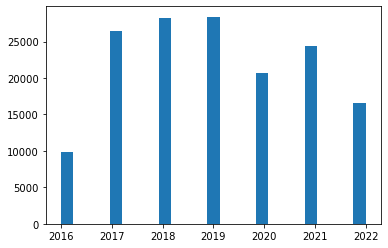

In [22]:
plt.hist(ml_fatal['CRASH DATE'], bins = 25)
plt.show()


In [ ]:

year = ml_fatal['CRASH DATE']
injured = ml_fatal['NUMBER OF PERSONS INJURED']
killed = ml_fatal['NUMBER OF PERSONS KILLED']

x = np.arange(len(year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, injured, width, label='Injured')
rects2 = ax.bar(x + width/2, killed, width, label='Killed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_title('Ratio of injuries to deaths in NYC fatal car crashes')
ax.set_xticks(x, year)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
plt.hist(ml_injured['BOROUGH'])
plt.show()


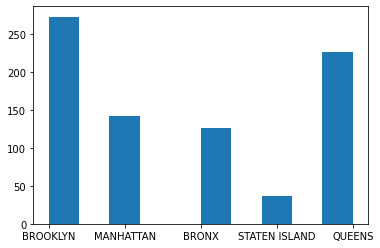

In [13]:
plt.hist(ml_killed['BOROUGH'])
plt.show()

In [12]:
# MODEL FOR INJURED
# split the data into data_train and data_val
x = ml_fatal[['INJURED OR KILLED' ]]
y = ml_fatal[['BOROUGH (NUM)']]




In [13]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)


In [ ]:
from sklearn import svm
# if you want a classification use this code
# model = svm.SVC()
# model.fit(x_train, y_train)

# if you want regression use this code
model = svm.SVR()
model.fit(x_train, y_train)

C:\Users\jbthe\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(2+2)
# predictions = model.predict(x_val)
# x['PREDICTED'] = predictions
# x

## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [41]:
# use this loop to test your model, you will need to talk about the error
error = 0
n = len(x_val)
for i in range(n):
    y_pred = model.predict(x_val[i])
    error = error + (y_pred - y_val)**2
MSE = error / n
RMSE = np.sqrt(MSE)

KeyError: 0

In [ ]:
# use the model to make a prediction about an unknown
